This notebook plots comparisons of temporal/atemporal performance for the MNIST and FashionMNIST phasor networks. Used in figure 5.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from utils import *
from models import *

In [3]:
limit_gpus()
set_gpu(None)

In [4]:
dpi=100

In [5]:
n_models = 8

In [6]:
fashion_files = ["models/fashion_model_"+str(i)+".npz" for i in range(n_models)]
mnist_files = ["models/mnist_model_"+str(i)+".npz" for i in range(n_models)]

In [7]:
fashion_results = [np.load(open(fashion_files[i], "rb")) for i in range(n_models)]
mnist_results = [np.load(open(mnist_files[i], "rb")) for i in range(n_models)]

In [8]:
#a simple class function is used to convert the outputs to predicted labels. don't need gpu execution
eval_model = PhasorModel((28,28,1))

In [9]:
def get_accuracy(file, model=eval_model):
    y_truth = file['ys']
    yh_static = model.predict(file['yh_static'], method="static")
    yh_dynamic_mode = model.predict(file['yh_dynamic'], method="dynamic_mode")
    yh_dynamic_mean = model.predict(file['yh_dynamic'], method="dynamic_mean")
    
    acc_fn = lambda x: np.mean(y_truth == x)
    static_acc = acc_fn(yh_static)
    dynmean_acc = acc_fn(yh_dynamic_mean)
    dynmode_acc = acc_fn(yh_dynamic_mode)
    
    return (static_acc, dynmean_acc, dynmode_acc)

In [10]:
fashion_accs = np.array([get_accuracy(fashion_results[i]) for i in range(n_models)])
mnist_accs = np.array([get_accuracy(mnist_results[i]) for i in range(n_models)])

/home/wolin/training/phasor_networks/models.py:105: RuntimeWarning: Mean of empty slice
  yh_avg = np.nanmean(yh, axis=1)


In [11]:
fashion_accs

array([[0.8403, 0.8361, 0.8361],
       [0.8227, 0.8106, 0.8106],
       [0.841 , 0.8364, 0.8364],
       [0.8326, 0.8242, 0.8242],
       [0.838 , 0.8289, 0.8289],
       [0.8404, 0.8355, 0.8355],
       [0.8366, 0.8265, 0.8265],
       [0.8433, 0.8382, 0.8382]])

In [12]:
mnist_accs

array([[0.9553, 0.9517, 0.9517],
       [0.9448, 0.9428, 0.9428],
       [0.9463, 0.9389, 0.9389],
       [0.9471, 0.9466, 0.9466],
       [0.9483, 0.9418, 0.9418],
       [0.9523, 0.9472, 0.9472],
       [0.9454, 0.9406, 0.9406],
       [0.9496, 0.9452, 0.9452]])

In [13]:
fashion_mean_loss = fashion_accs[:,0] - fashion_accs[:,1]
fashion_mode_loss = fashion_accs[:,0] - fashion_accs[:,2]

In [14]:
mnist_mean_loss = mnist_accs[:,0] - mnist_accs[:,1]
mnist_mode_loss = mnist_accs[:,0] - mnist_accs[:,2]

Text(0.5, 0, 'Fashion MNIST Model')

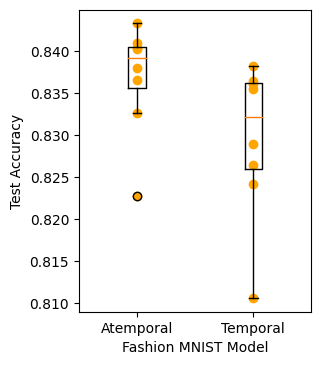

In [15]:
plt.figure(dpi=dpi, figsize=(3,4))

plt.boxplot([fashion_accs[:,0], fashion_accs[:,2]])
#plt.boxplot([fashion_accs[:,0], fashion_accs[:,2], mnist_accs[:,0], mnist_accs[:,2]])

plt.scatter(np.ones_like(fashion_accs[:,0]), fashion_accs[:,0], color="orange")
plt.scatter(2*np.ones_like(fashion_accs[:,0]), fashion_accs[:,2], color="orange")
# plt.scatter(3*np.ones_like(mnist_accs[:,0]), mnist_accs[:,0], color="orange")
# plt.scatter(4*np.ones_like(mnist_accs[:,0]), mnist_accs[:,2], color="orange")

#plt.xticks(np.arange(1,3,1), ["Atemporal\nFashion MNIST", "Temporal\nMNIST", "Atemporal\nStandard MNIST", "Temporal\nStandard MNIST"])
plt.xticks(np.arange(1,3,1), ["Atemporal", "Temporal",])
plt.ylabel("Test Accuracy")
plt.xlabel("Fashion MNIST Model")
#plt.text(2.2,0.011,"N="+str(n_models))

Text(0.5, 0, 'Standard MNIST Model')

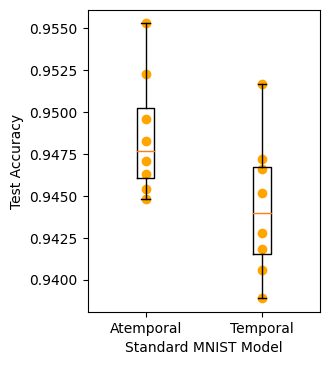

In [16]:
plt.figure(dpi=dpi, figsize=(3,4))

plt.boxplot([mnist_accs[:,0], mnist_accs[:,2]])
#plt.boxplot([fashion_accs[:,0], fashion_accs[:,2], mnist_accs[:,0], mnist_accs[:,2]])

plt.scatter(np.ones_like(mnist_accs[:,0]), mnist_accs[:,0], color="orange")
plt.scatter(2*np.ones_like(mnist_accs[:,0]), mnist_accs[:,2], color="orange")
# plt.scatter(3*np.ones_like(mnist_accs[:,0]), mnist_accs[:,0], color="orange")
# plt.scatter(4*np.ones_like(mnist_accs[:,0]), mnist_accs[:,2], color="orange")

#plt.xticks(np.arange(1,3,1), ["Atemporal\nFashion MNIST", "Temporal\nMNIST", "Atemporal\nStandard MNIST", "Temporal\nStandard MNIST"])
plt.xticks(np.arange(1,3,1), ["Atemporal", "Temporal",])
plt.ylabel("Test Accuracy")
plt.xlabel("Standard MNIST Model")
#plt.text(2.2,0.011,"N="+str(n_models))

Text(2.1, 0.011, 'N=8')

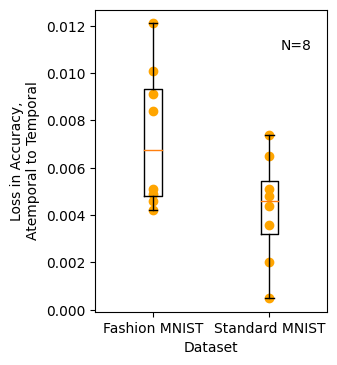

In [17]:
plt.figure(dpi=dpi, figsize=(3,4))
plt.scatter(np.ones_like(fashion_mode_loss), fashion_mode_loss, color="orange")
plt.scatter(2*np.ones_like(mnist_mode_loss), mnist_mode_loss, color="orange")
plt.boxplot([fashion_mode_loss, mnist_mode_loss])
plt.xticks(np.arange(1,3,1), ["Fashion MNIST", "Standard MNIST"])
plt.ylabel("Loss in Accuracy,\nAtemporal to Temporal")
plt.xlabel("Dataset")
plt.text(2.1,0.011,"N="+str(n_models))

In [18]:
avgloss = np.mean(np.concatenate((fashion_mode_loss, mnist_mode_loss),axis=0))

In [19]:
avgloss

0.00580000000000002